# Импорт библиотек

In [353]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание датасетов

1. Датасеты с качаственными данными

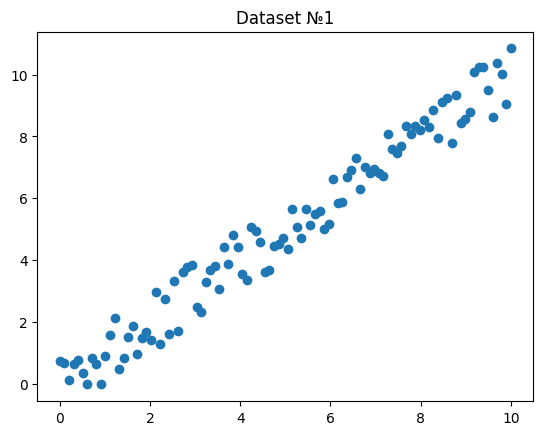

In [354]:
# Дасет №1
xs = np.linspace(0, 10, 100)
ys1 = xs + np.random.random(100)*2 - 1

plt.scatter(xs, ys1)
plt.title("Dataset №1")
plt.show()

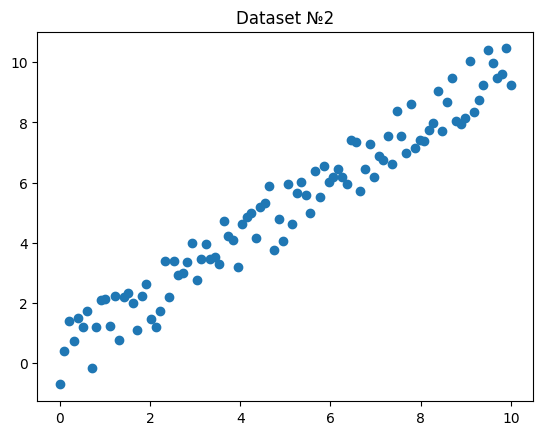

In [355]:
# Дасет №2
ys2 = xs + np.random.random(100)*2.23 - 1

plt.scatter(xs, ys2)
plt.title("Dataset №2")
plt.show()

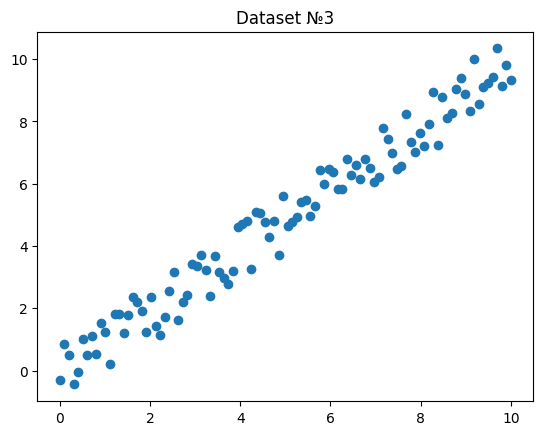

In [360]:
# Дасет №3
ys3 = xs + np.random.random(100)*2 - 1.1448

plt.scatter(xs, ys3)
plt.title("Dataset №3")
plt.show()

2. Датасет с шумом в данных

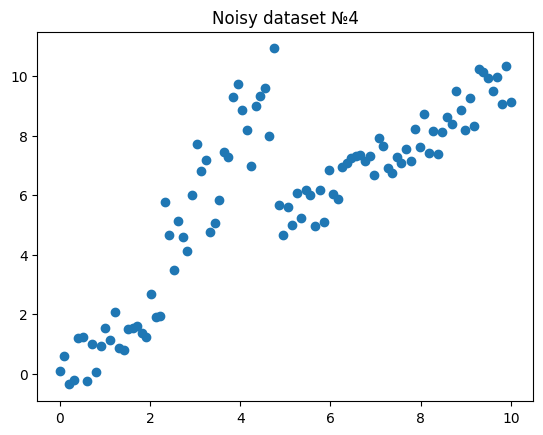

In [357]:
# Дасет №4
ys4 = xs + np.random.random(100)*2 - 1
ys4[23:48]*=2

plt.scatter(xs, ys4)
plt.title("Noisy dataset №4")
plt.show()

# Обучение модели линейной регрессии на первом датасете

In [358]:
X_train = xs.reshape(-1, 1)
y_train = ys1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Анализ качества предсказания модели

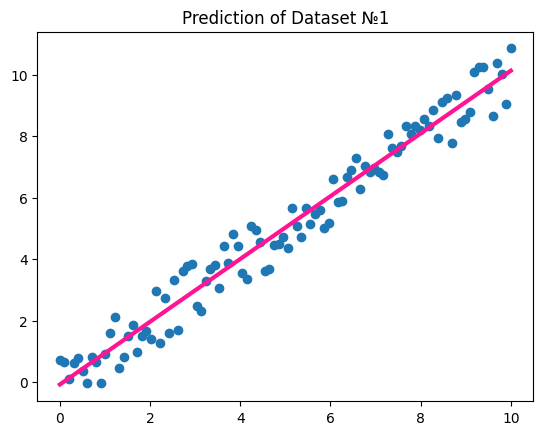

Parameters for Dataset №1
Mean squared error: 0.34
Coefficient of determination: 0.96
Coefficient of model: 1.02



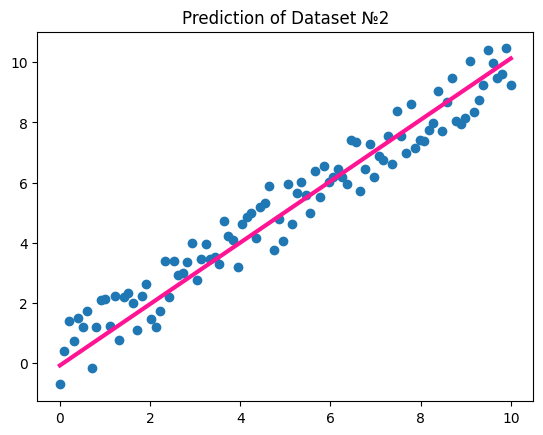

Parameters for Dataset №2
Mean squared error: 0.47
Coefficient of determination: 0.94
Coefficient of model: 1.02



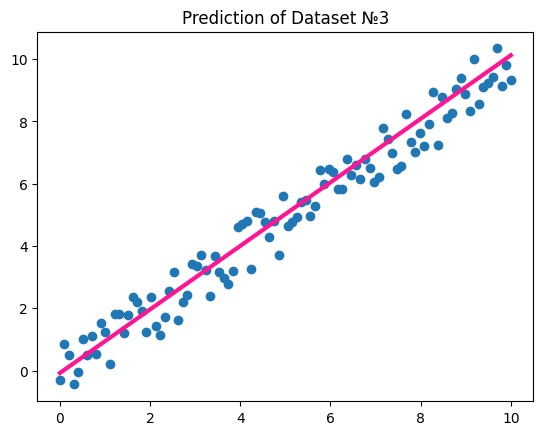

Parameters for Dataset №3
Mean squared error: 0.35
Coefficient of determination: 0.96
Coefficient of model: 1.02



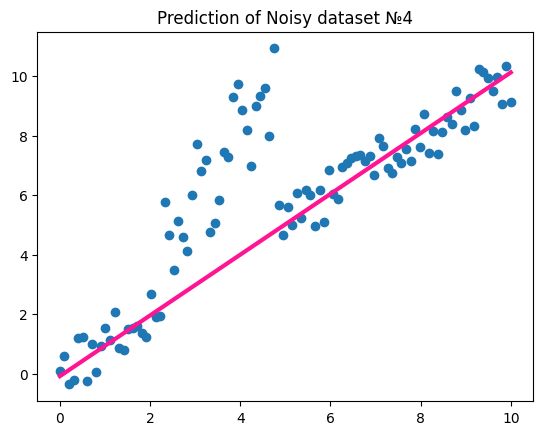

Parameters for Noisy dataset №4
Mean squared error: 3.82
Coefficient of determination: 0.59
Coefficient of model: 1.02



In [361]:
# Функция для анализа качества предсказания
def analyze_predictions(xs, ys, dataset_name, idx):
    y_pred = model.predict(xs.reshape(-1, 1))

    # Сохранение значение y-ов и аппроксимации
    np.savetxt(f"ys_{idx}.csv", ys, delimiter=",")
    np.savetxt(f"y_pred_{idx}.csv", y_pred, delimiter=",")

    plt.scatter(xs, ys)
    plt.plot(xs.reshape(-1, 1), y_pred, color="deeppink", linewidth=3)
    plt.title(f"Prediction of {dataset_name}")
    plt.show()

    # Расчет среднего квадратического отклонения
    print(f"Parameters for {dataset_name}")
    print(f"Mean squared error: %.2f" % mean_squared_error(ys, y_pred))

    # Расчет коэффициента детерминации
    print(f"Coefficient of determination: %.2f" % r2_score(ys, y_pred))

    # Расчет коэффициента модели
    print(f"Coefficient of model: %.2f" % model.coef_.item())
    print()

# Анализ качества предсказания на всех датасетах
analyze_predictions(xs, ys1, "Dataset №1", 1)
analyze_predictions(xs, ys2, "Dataset №2", 2)
analyze_predictions(xs, ys3, "Dataset №3", 3)
analyze_predictions(xs, ys4, "Noisy dataset №4", 4)

# Тестирование работы модели

1. Создание файла с тестами

In [362]:
%%writefile test_score.py
import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score

def load_mse(idx):
    ys = np.loadtxt(f"ys_{idx}.csv", delimiter=",")
    y_pred = np.loadtxt(f"y_pred_{idx}.csv", delimiter=",")

    mse_value = mean_squared_error(ys, y_pred)
    return mse_value

def load_r2(idx):
    ys = np.loadtxt(f"ys_{idx}.csv", delimiter=",")
    y_pred = np.loadtxt(f"y_pred_{idx}.csv", delimiter=",")

    r2_value = r2_score(ys, y_pred)
    return r2_value

list = list(range(1, 5))
# @pytest.mark.nondestructive
@pytest.mark.parametrize("idx",list)

# Тест проверки СКО
def test_mse(idx):
    assert load_mse(idx) < 0.5, f"Test failed for file: ys_{idx}.csv"

@pytest.mark.parametrize("idx",list)
# Тест проверки коэффициента детерминации
def test_r2(idx):
    assert load_r2(idx) > 0.9, f"Test failed for file: ys_{idx}.csv"

Overwriting test_score.py


2. Запуск тестов



In [363]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 8 items                                                                                  

test_score.py::test_mse[1] PASSED                                                            [ 12%]
test_score.py::test_mse[2] PASSED                                                            [ 25%]
test_score.py::test_mse[3] PASSED                                                            [ 37%]
test_score.py::test_mse[4] FAILED                                                            [ 50%]
test_score.py::test_r2[1] PASSED                                                             [ 62%]
test_score.py::test_r2[2] PASSED                                                             [ 75%]
test_score.py::test_r2[3] PASSED                      

# Unit-тест
1. Создание отдельной папки для файла с Unit-тестами

In [364]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


2. Создание файла с Unit-тестами

In [365]:
%%writefile test_module/test_unit.py
import numpy as np
import unittest
from sklearn.metrics import mean_squared_error, r2_score


class TestMethods(unittest.TestCase):

    #Dataset 1
    def test_mse1(self):
        ys = np.loadtxt(f"ys_1.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_1.csv", delimiter=",")
        self.assertLess(mean_squared_error(ys, y_pred), 0.5, f"Test failed for dataset 1")

    def test_r2_1(self):
        ys = np.loadtxt(f"ys_1.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_1.csv", delimiter=",")
        self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset 1")

    #Dataset 2
    def test_mse2(self):
        ys = np.loadtxt(f"ys_2.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_2.csv", delimiter=",")
        self.assertLess(mean_squared_error(ys, y_pred), 0.5, f"Test failed for dataset 2")

    def test_r2_2(self):
        ys = np.loadtxt(f"ys_2.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_2.csv", delimiter=",")
        self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset 2")

    #Dataset 3
    def test_mse3(self):
        ys = np.loadtxt(f"ys_3.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_3.csv", delimiter=",")
        self.assertLess(mean_squared_error(ys, y_pred), 0.5, f"Test failed for dataset 3")

    def test_r2_3(self):
        ys = np.loadtxt(f"ys_3.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_3.csv", delimiter=",")
        self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset 3")

    #Dataset 4
    def test_mse4(self):
        ys = np.loadtxt(f"ys_4.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_4.csv", delimiter=",")
        self.assertLess(mean_squared_error(ys, y_pred), 0.5, f"Test failed for dataset 4")

    def test_r2_4(self):
        ys = np.loadtxt(f"ys_4.csv", delimiter=",")
        y_pred = np.loadtxt(f"y_pred_4.csv", delimiter=",")
        self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset 4")

if __name__ == '__main__':
    unittest.main()

# в unittest отвратительные декораторы -_-

Overwriting test_module/test_unit.py


3. Запуск Unit-тестов

In [366]:
!python -m unittest test_module/test_unit.py

...F...F
FAIL: test_mse4 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 45, in test_mse4
    self.assertLess(mean_squared_error(ys, y_pred), 0.5, f"Test failed for dataset 4")
AssertionError: 3.8221450784112285 not less than 0.5 : Test failed for dataset 4

FAIL: test_r2_4 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 50, in test_r2_4
    self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset 4")
AssertionError: 0.5882815760849924 not greater than 0.9 : Test failed for dataset 4

----------------------------------------------------------------------
Ran 8 tests in 0.008s

FAILED (failures=2)


# Вывод по тестам
Тесты отработали с ошибками по метрикам четвертого датасета с шумами в данных.

Модель, обученная на первом датасете, не учитывает выбросы в четвертом датасете с шумами в интервале от 23 до 48, из чего сведетельствует ухудшение метрик по СКО и коэффициенту детерминации. Нужно переобучать новую модель для данных с шумами.

# Обнаружение проблемы на датасете с шумом в данных
Анализ остатков модели на датасете 4

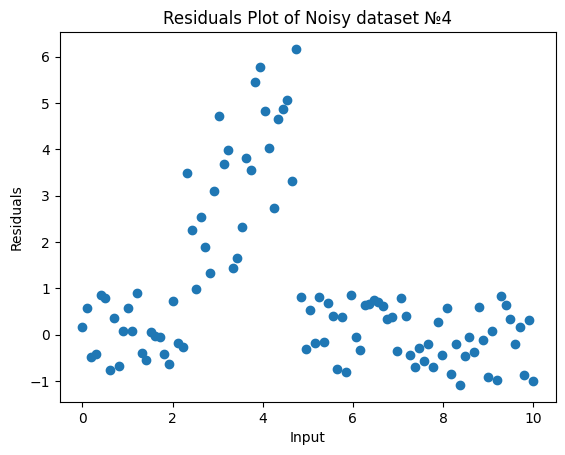

In [370]:
y_pred4 = model.predict(xs.reshape(-1, 1))
residuals = ys4 - y_pred4.flatten()

plt.scatter(xs, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot of Noisy dataset №4")
plt.show()

Исходя из анализа остатков модели, то есть разницы между фактическими значениями и предсказанными значениями, остатки показывают некоторую структуру или паттерн, что может указывать на проблему в модели или неучтённые факторы в данных.


Из графика остатков, можно отметить:

* Неравномерность разброса остатков: Остатки не распределены
равномерно вокруг нуля. В некоторых областях наблюдается большее скопление точек с высокими значениями остатков (например, на интервале x =(2, 5) или y = (-1,1). Это может свидетельствовать о гетероскедастичности, то есть непостоянстве дисперсии ошибок модели.
* Неслучайность распределения остатков: Можно заметить определенные паттерны в распределении остатков. Например, на интервале x =(2, 5) остатки сгруппированы в вертикальный стобец. Это может указывать на нелинейную зависимость в данных, которую модель не смогла уловить.
* Наличие выбросов: Встречаются точки, значительно удаленные от остальных. Выбросы могут искажать результаты модели и снижать ее точность.